In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
customer_df = pd.read_csv('../data/Wholesale_customers_data.csv')
customer_df.drop(['Channel', 'Region'], axis=1, inplace=True)

In [3]:
customer_df.shape

(440, 6)

In the next few notebooks, we are going to do some Unsupervised Exploration of the `customer` table in our Database.

> What does a data scientist do? PCA on the `customer` table. - Joshua Cook

# Basic Stats

In [4]:
from scipy.stats import skew

In [5]:
skew(customer_df)

array([  2.55258269,   4.03992212,   3.57518722,   5.88782573,
         3.61945758,  11.11353365])

In [6]:
import random 

random.sample(range(10), 2)

[0, 2]

In [7]:
stats = customer_df.describe().T
stats['skew'] = skew(customer_df)
stats

,count,mean,std,min,25%,50%,75%,max,skew
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534


# Sampling the Dataset 

In this notebook, we begin to explore the `customer` table by sampling the table. First, let's sample three random points and examine them. 

In [8]:
np.random.seed(42)

In [9]:
sample = customer_df.sample(3)

In [10]:
sample

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
265,5909,23527,13699,10155,830,3636
78,10766,1175,2067,2096,301,167
347,27380,7184,12311,2809,4621,1022


In [11]:
stats

,count,mean,std,min,25%,50%,75%,max,skew
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534


# Sampling for a Statistical Description

We are able to take the mean and standard deviation of the data, but what if we want to visualize it? 

Of course, this dataset is small, but we might want techniques that work even when the dataset is very large.

Let's start by looking at 1% of the data. 

In [12]:
sample_1pct_1 = customer_df.sample(5)

In [13]:
sample_1pct_1.mean()

Fresh               14123.6
Milk                 5801.0
Grocery              5475.8
Frozen               2812.6
Detergents_Paper     1097.8
Delicatessen         1987.6
dtype: float64

### How does this compare to the actual mean?

In [14]:
sample_1pct_1.mean() - stats['mean']

Fresh               2123.302273
Milk                   4.734091
Grocery            -2475.477273
Frozen              -259.331818
Detergents_Paper   -1783.693182
Delicatessen         462.729545
dtype: float64

Let's think about this in terms of the standard deviations.

In [15]:
(sample_1pct_1.mean() - stats['mean'])/stats['std']

Fresh               0.167885
Milk                0.000641
Grocery            -0.260490
Frozen             -0.053419
Detergents_Paper   -0.374108
Delicatessen        0.164082
dtype: float64

### How does it do?


### Let's try it again

In [16]:
sample_1pct_2 = customer_df.sample(5)

In [17]:
sample_1pct_2.mean() - stats['mean']

Fresh              -2157.497727
Milk                 484.534091
Grocery             1619.922727
Frozen              -310.531818
Detergents_Paper     524.306818
Delicatessen          39.729545
dtype: float64

In [18]:
(sample_1pct_2.mean() - stats['mean'])/stats['std']

Fresh              -0.170589
Milk                0.065652
Grocery             0.170461
Frozen             -0.063966
Detergents_Paper    0.109967
Delicatessen        0.014088
dtype: float64

### How does it do?

### Repeatedly Sample

Let's do it 10 times.

In [19]:
sample_means = []
for _ in range(10):
    sample_means.append(customer_df.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['std']

Fresh              -0.100475
Milk                0.085239
Grocery            -0.010988
Frozen              0.000051
Detergents_Paper    0.062445
Delicatessen       -0.155884
dtype: float64

And 50 times.

In [20]:
sample_means = []
for _ in range(50):
    sample_means.append(customer_df.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['std']

Fresh              -0.001005
Milk                0.014526
Grocery            -0.009778
Frozen              0.080827
Detergents_Paper   -0.029035
Delicatessen        0.037616
dtype: float64

And 100 times.

In [21]:
sample_means = []
for _ in range(100):
    sample_means.append(customer_df.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['std']

Fresh              -0.056725
Milk               -0.032065
Grocery            -0.039822
Frozen              0.003006
Detergents_Paper   -0.040477
Delicatessen        0.030977
dtype: float64

### What do we notice?

### Take a larger sample

Totally different. Which makes sense ... we're only taking 1% of the data!

What if we take a sample of 10% of the data?

In [22]:
sample_10pct_1 = customer_df.sample(44)
(sample_10pct_1.mean() - stats['mean'])/stats['std']

Fresh              -0.050512
Milk                0.049586
Grocery             0.128665
Frozen             -0.105639
Detergents_Paper    0.087743
Delicatessen       -0.009383
dtype: float64

### Is this sample good enough for plotting?

https://stats.stackexchange.com/questions/2541/is-there-a-reference-that-suggest-using-30-as-a-large-enough-sample-size

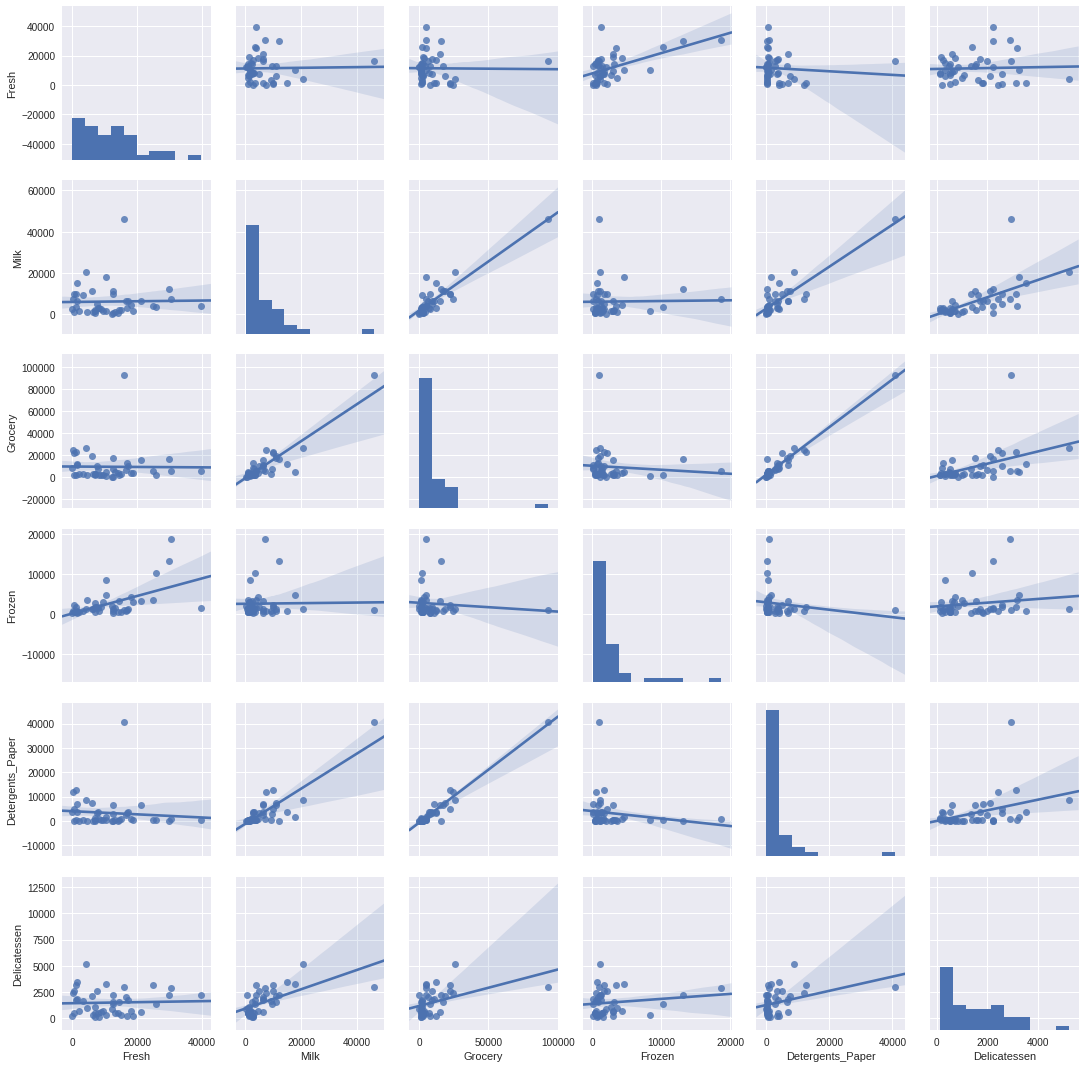

In [23]:
sns.pairplot(sample_10pct_1, kind='reg')